Introduction
============
**Topic**: Introduction to NetworkX

This notebook is a part of a collection of notebooks and includes basic information and examples to implement graphs using NetworkX and apply them in path planning algorithms.

Version | Author
------------ | -------------
0.2 | Björn Hein

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html

Content:

* [Graph handling](#Graph-handling)
* [Drawing graphs](#Drawing-graphs)
* [Lecture examples](#Lecture-examples)

In [1]:
import networkx as nx 

# inline drawing with extended functionality
#%matplotlib notebook 

In [2]:
print(nx.__version__)

3.4.1


# Graph handling
## Creating a graph

In [3]:
G = nx.Graph()
print(dir(nx))

['AmbiguousSolution', 'ArborescenceIterator', 'DiGraph', 'EdgePartition', 'ExceededMaxIterations', 'Graph', 'GraphMLReader', 'GraphMLWriter', 'HasACycle', 'LCF_graph', 'LFR_benchmark_graph', 'MultiDiGraph', 'MultiGraph', 'NetworkXAlgorithmError', 'NetworkXError', 'NetworkXException', 'NetworkXNoCycle', 'NetworkXNoPath', 'NetworkXNotImplemented', 'NetworkXPointlessConcept', 'NetworkXTreewidthBoundExceeded', 'NetworkXUnbounded', 'NetworkXUnfeasible', 'NodeNotFound', 'NotATree', 'PlanarEmbedding', 'PowerIterationFailedConvergence', 'SpanningTreeIterator', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_clear_cache', '_dispatchable', '_lazy_import', 'adamic_adar_index', 'add_cycle', 'add_path', 'add_star', 'adjacency', 'adjacency_data', 'adjacency_graph', 'adjacency_matrix', 'adjacency_spectrum', 'adjlist', 'algebraic_connectivity', 'algebraicconnectivity', 'algorithms', 'all', 'all_neighbors', 'all_node

## Adding Nodes

In [4]:
G.add_node(1) # G.add_node(id) --> id can be any hashable object

In [5]:
G.add_nodes_from([2,3,"A"])

In [6]:
print(G)

Graph with 4 nodes and 0 edges


## Adding Edges

In [7]:
G.add_edge(1,2) #add one edge between two nodes without an direction
e=(2,3)
G.add_edge(*e)
G.add_node("Bob")
G.add_node("Marie")
G.add_edge("Bob","Marie")
G.add_edge("Bob","A")

In [8]:
G.number_of_nodes()

6

In [9]:
G.nodes()

NodeView((1, 2, 3, 'A', 'Bob', 'Marie'))

In [10]:
G.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}, 'A': {}, 'Bob': {}, 'Marie': {}})

In [11]:
G.edges(data=True)

EdgeDataView([(1, 2, {}), (2, 3, {}), ('A', 'Bob', {}), ('Bob', 'Marie', {})])

## Node attributes

In [12]:
G.nodes[1]['color']="red"
G.nodes[1]['time']=4.3
G.nodes["A"]['RKIM']="Master"

In [13]:
G.nodes[1]

{'color': 'red', 'time': 4.3}

In [14]:
G.nodes['A']

{'RKIM': 'Master'}

## Edge attributes

In [15]:
G["Bob"]["Marie"]["weight"]=100.3

In [16]:
G["Bob"]["Marie"]

{'weight': 100.3}

## Analyzing

In [17]:
con_comp = nx.connected_components(G)
print(list(con_comp))

[{1, 2, 3}, {'A', 'Marie', 'Bob'}]


In [18]:
for a in con_comp:
    print(a)

# Drawing graphs

In [19]:
import matplotlib.pyplot as plt

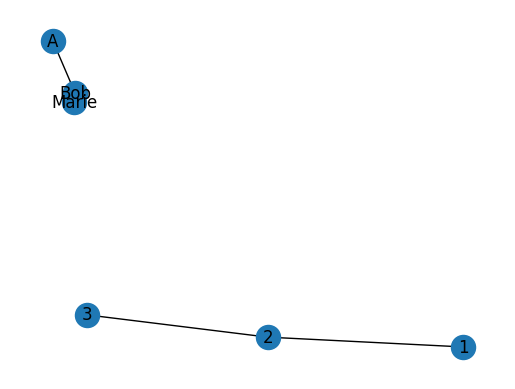

In [20]:
fig, axes = plt.subplots()
nx.draw(G, ax=axes, with_labels=True)

# Lecture examples
Following examples are according to the slides provided in the lecture.

## Initialiizing graphs
### Undirected graph

In [21]:
G_undir = nx.Graph()

In [22]:
G_undir.add_nodes_from(["A","B","C","D"])

In [23]:
G_undir.add_edges_from([("A","B"),("B","C"),("C","D"),("D","B")])

In [24]:
colors = ['blue' for i in range(4)]
print(colors)

['blue', 'blue', 'blue', 'blue']


In [25]:
#colors_two = {"A": "lightblue", "B": "red"}

In [26]:
colors[0]="Yellow"

In [27]:
print(colors)

['Yellow', 'blue', 'blue', 'blue']


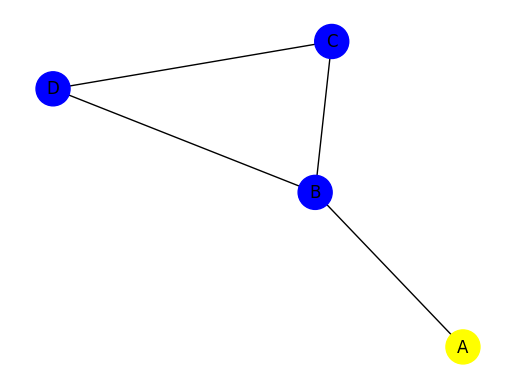

In [28]:
fig, axes = plt.subplots()
nx.draw(G_undir,with_labels=True, node_color=colors, node_size=600.0, ax=axes) 
# Remark: ax=axes can be omitted if you just want to draw in the last generated figure (e.g. by plt.subplots() or plt.figure(), etc)
# It gives you the possibility to draw in a specified figure, even when plotted in the notebook before.

### Directed graph

In [36]:
G_dir = nx.DiGraph()

In [37]:
G_dir.add_nodes_from(["A","B","C","D"])

In [38]:
G_dir.add_edges_from([("A","B"),("B","C"),("C","D"),("D","B")])

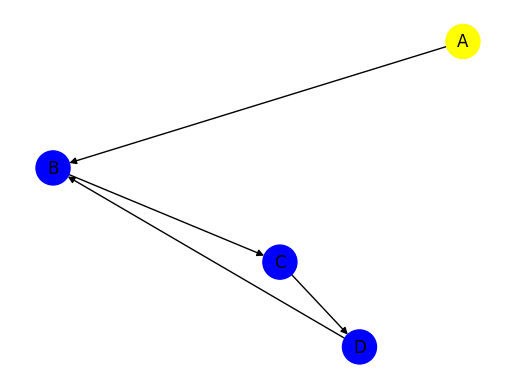

In [39]:
fig, axes = plt.subplots()
nx.draw(G_dir,with_labels=True, node_color=colors, node_size=600.0)

## Add attribute to edges 

### Undirected graph

In [40]:
#fig, axes = plt.subplots()

# Set weight to edges
G_undir["A"]["B"]["weight"] = 3
G_undir["B"]["C"]["weight"] = 2
G_undir["C"]["D"]["weight"] = 4
G_undir["D"]["B"]["weight"] = 10

# Generate positions based on specific layout "spring"
pos = nx.spiral_layout(G_undir)


In [41]:
print(pos)

{'A': array([-0.64153279, -0.68555087]), 'B': array([-0.03307913, -0.46344795]), 'C': array([0.34927952, 0.14899882]), 'D': array([0.32533239, 1.        ])}


{'A': array([-0.64153279, -0.68555087]), 'B': array([-0.03307913, -0.46344795]), 'C': array([0.34927952, 0.14899882]), 'D': array([0.32533239, 1.        ])}


{('A', 'B'): Text(-0.33730071961614233, -0.5744974993643721, '3'),
 ('B', 'C'): Text(0.15809884804119412, -0.15722672307986774, '2'),
 ('B', 'D'): Text(0.14612763196022793, 0.2682801106031316, '10'),
 ('C', 'D'): Text(0.3373056745343288, 0.5745095328596701, '4')}

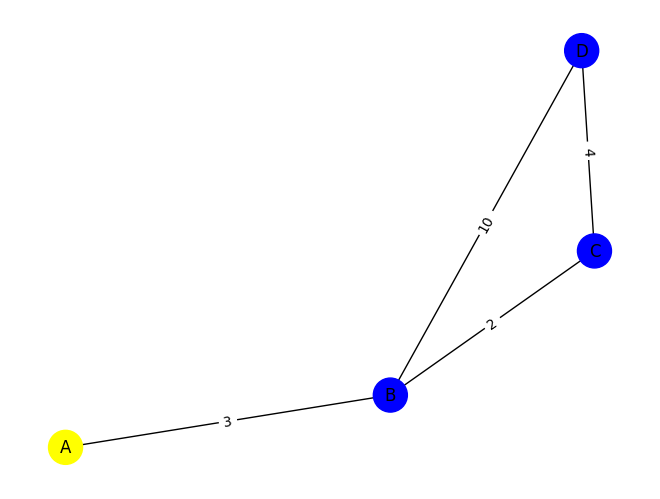

In [42]:
print(pos)
# Draw nodes and edges
nx.draw(G_undir, pos,  with_labels=True, node_color=colors, node_size=600.0)

# Get specific edge attribute and draw
edge_attributes = nx.get_edge_attributes(G_undir,'weight')
nx.draw_networkx_edge_labels(G_undir, pos, edge_labels=edge_attributes)

### Directed Graph

{('A', 'B'): Text(-0.33730444158878203, -0.5744988579904428, '2'),
 ('B', 'C'): Text(0.15809963128149018, -0.1572254685169443, '3'),
 ('B', 'D'): Text(0.14612330264773488, 0.26826243337169364, '4'),
 ('C', 'D'): Text(0.33730557995777755, 0.5745128937950281, '8'),
 ('D', 'B'): Text(0.14612995980657373, 0.26828961554847197, '7')}

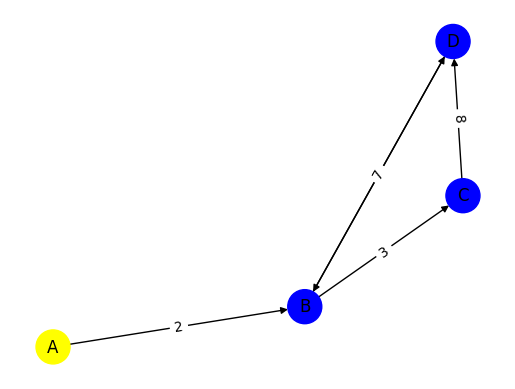

In [43]:
fig, axes = plt.subplots()

# Set weight to edges
G_dir["A"]["B"]["weight"] = 2
G_dir["B"]["C"]["weight"] = 3
G_dir["C"]["D"]["weight"] = 8
G_dir["D"]["B"]["weight"] = 7

G_dir.add_edge("B","D", weight=4)
# or 
# G_dir.add_edge("B","D", weight=4)
# G_dir["B"]["D"]["weight"] = 4

# Draw nodes and edges
nx.draw(G_dir, pos, with_labels=True, node_color=colors, node_size=600.0)

# Get specific edge attribute and draw
edge_attributes = nx.get_edge_attributes(G_dir,'weight')
nx.draw_networkx_edge_labels(G_dir, pos, edge_labels=edge_attributes)


{('A', 'B'): Text(-0.4507253555574123, -0.615900723498703, '2'),
 ('B', 'C'): Text(0.08848229701656862, -0.26873572510122257, '3'),
 ('B', 'D'): Text(0.07852652269979465, -0.007745345136297432, '4'),
 ('C', 'D'): Text(0.34155815970619186, 0.4233903855179464, '8'),
 ('D', 'B'): Text(0.21372673975451373, 0.5442973940564628, '7')}

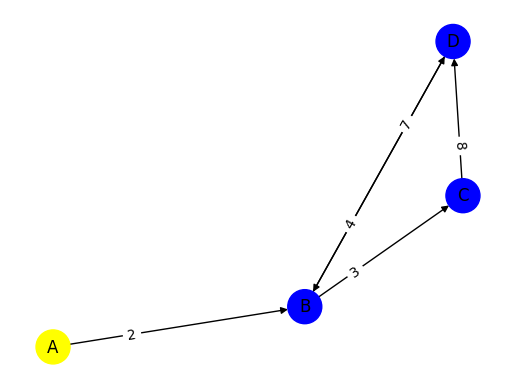

In [44]:
fig, axes = plt.subplots()

# shift labels so they don't overlap, e.g. edge ("B","D") and ("D","B")
nx.draw(G_dir, pos, with_labels=True, node_color=colors, node_size=600.0)
nx.draw_networkx_edge_labels(G_dir, pos, edge_labels=edge_attributes,  label_pos=0.3)
 

## Finding paths
http://networkx.github.io/documentation/latest/reference/algorithms.shortest_paths.html


### Undirected Graph


In [45]:
shortest_path = nx.shortest_path(G_undir,source="A",target="D", weight="weight")

In [46]:
print(shortest_path)

['A', 'B', 'C', 'D']


{'A': array([-0.64153279, -0.68555087]), 'B': array([-0.03307913, -0.46344795]), 'C': array([0.34927952, 0.14899882]), 'D': array([0.32533239, 1.        ])}
['A', 'B', 'C', 'D']
[('A', 'B'), ('B', 'C'), ('C', 'D')]
{('A', 'B'): 3, ('B', 'C'): 2, ('B', 'D'): 10, ('C', 'D'): 4}


{('A', 'B'): Text(-0.33730444158878203, -0.5744988579904428, '3'),
 ('B', 'C'): Text(0.15809963128149018, -0.1572254685169443, '2'),
 ('B', 'D'): Text(0.14612330264773488, 0.26826243337169364, '10'),
 ('C', 'D'): Text(0.33730557995777755, 0.5745128937950281, '4')}

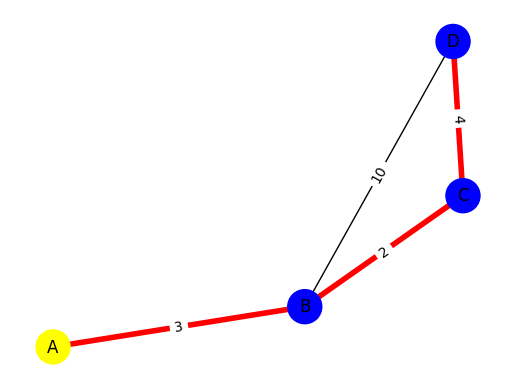

In [47]:
fig, axes = plt.subplots()

# Draw nodes and edges
nx.draw(G_undir, pos, with_labels=True, node_color=colors, node_size=600.0)



# Generate and draw the solution path
edgeList = [(shortest_path[i],shortest_path[i+1]) for i in range(len(shortest_path)-1)]
print(pos)
print(shortest_path)
print(edgeList)
nx.draw_networkx_edges(G_undir, pos, edgelist=edgeList, edge_color="red", width=4.0)

# Get specific edge attribute and draw
edge_attributes = nx.get_edge_attributes(G_undir,'weight')
print(edge_attributes)
nx.draw_networkx_edge_labels(G_undir, pos, edge_labels=edge_attributes)

In [48]:
costs_undir = sum(edge_attributes[i] for i in edgeList)
print(costs_undir)

9


### Directed Graph


In [49]:
# remove edge B-D from example
try:
    G_dir.remove_edge("B","D")
except:
    print("no edge existing")

In [50]:
shortest_path = nx.shortest_path(G_dir,source="A",target="D", weight="weight")
print(shortest_path)

['A', 'B', 'C', 'D']


{('A', 'B'): Text(-0.33730444158878203, -0.5744988579904428, '2'),
 ('B', 'C'): Text(0.15809963128149018, -0.1572254685169443, '3'),
 ('C', 'D'): Text(0.33730557995777755, 0.5745128937950281, '8'),
 ('D', 'B'): Text(0.14612995980657373, 0.26828961554847197, '7')}

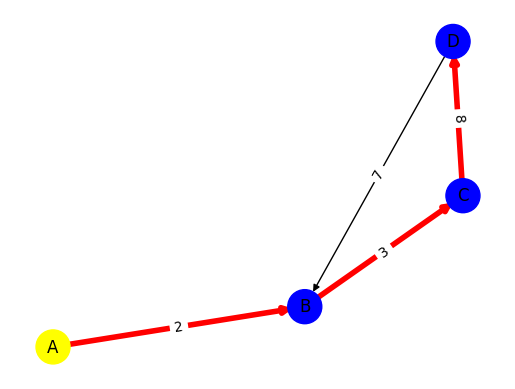

In [51]:
fig, axes = plt.subplots()

# Draw nodes and edges
nx.draw(G_dir, pos, with_labels=True, node_color=colors, node_size=600.0)

# Generate and draw the solution path
edgeList = [(shortest_path[i],shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G_dir, pos, edgelist=edgeList, edge_color="red", width=4.0)

# Get specific edge attribute and draw
edge_attributes = nx.get_edge_attributes(G_dir,'weight')
nx.draw_networkx_edge_labels(G_dir, pos, edge_labels=edge_attributes)

In [52]:
costs_dir = sum(edge_attributes[i] for i in edgeList)
print(costs_dir)

13


## Further tests


In [53]:
nx.is_connected(G_undir)

True

In [54]:
nx.cycle_basis(G_undir)

[['C', 'B', 'D']]

In [55]:
for i in nx.simple_cycles(G_dir):
    print(i)

['C', 'D', 'B']


## Representation


In [56]:
print(G.nodes())

[1, 2, 3, 'A', 'Bob', 'Marie']


Add again edge with weight=4.0 between B-D to align with example in slides

In [57]:
G_dir.add_edge("B","D", weight=4)

Check https://networkx.github.io/documentation/latest/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html#networkx.linalg.graphmatrix.adjacency_matrix !



In [58]:
print(G_dir.nodes())
print(sorted(G_dir.nodes()))

['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D']


In [59]:
adj_matrix = nx.adjacency_matrix(G_dir, sorted(G_dir.nodes()))

In [60]:
print(adj_matrix)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 5 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	2
  (1, 2)	3
  (1, 3)	4
  (2, 3)	8
  (3, 1)	7


In [61]:
adj_matrix.toarray()

array([[0, 2, 0, 0],
       [0, 0, 3, 4],
       [0, 0, 0, 8],
       [0, 7, 0, 0]])

# Layouting

In the planning environment it will be important to place the node at certain positions. In the following some hints are given how to use attributes of nodes in NetworkX to do so.

In [62]:
G_graph = nx.Graph()


In [63]:
G_graph.add_node("A", mist = [0,1])

In [64]:
G_graph.add_node("B", mist = [10,1])
G_graph.add_node("C", mist = [1,10])
G_graph.add_node("D", mist = [1,8])

In [65]:
G_graph.add_edge("A","B")
G_graph.add_edge("B","C")

In [66]:
G_graph.nodes(data=True)

NodeDataView({'A': {'mist': [0, 1]}, 'B': {'mist': [10, 1]}, 'C': {'mist': [1, 10]}, 'D': {'mist': [1, 8]}})

In [67]:
pos_mist = nx.get_node_attributes(G_graph,'mist')

In [68]:
pos_mist

{'A': [0, 1], 'B': [10, 1], 'C': [1, 10], 'D': [1, 8]}

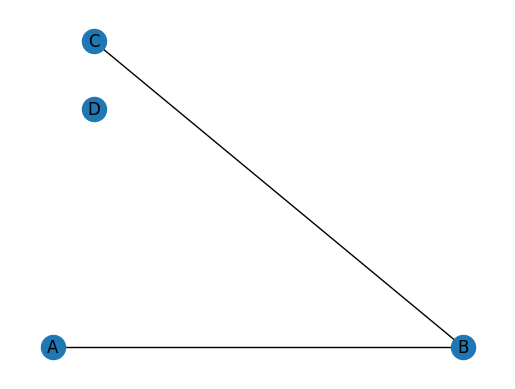

In [69]:
fig, axes = plt.subplots()

nx.draw(G_graph, pos=pos_mist, with_labels=True)   

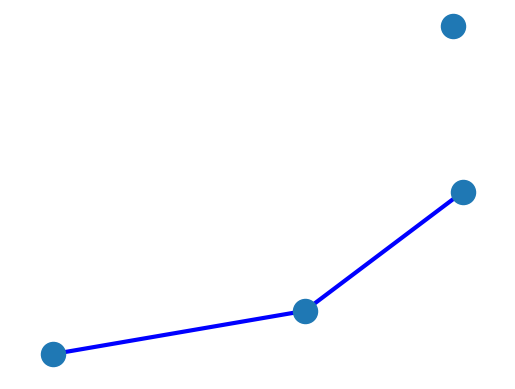

In [71]:
fig, axes = plt.subplots()

nx.draw(G_graph, pos=pos, with_labels=False)
nx.draw_networkx_edges(G_graph,pos,
                           edge_color='b',
                            width=3.0
                        )

In [72]:
for node in G_graph.nodes(data=True):
    print(node)

('A', {'mist': [0, 1]})
('B', {'mist': [10, 1]})
('C', {'mist': [1, 10]})
('D', {'mist': [1, 8]})


In [73]:
a = G_graph.nodes["A"]

Conclusion
==========

Using and drawing of graphs can be done very nicely with the combination of networkX and matplotlib

# Exercice

1. Graph with x nodes at random position
2. Graph with x nodes at random position and all nodes are connected with edges
3. Graph with x nodes at random position, nodes with given distance are connected


In [88]:
#Hausaufgabe - Bearbeitung im 3.1 Jupyter Notebook

# Aufgabe 1 - MS

In [30]:
# generate graph
G_graph_ms=nx.Graph()

# adding nodes
G_graph_ms.add_node("A")
G_graph_ms.add_node("B")

more_nodes = ["C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O"]
G_graph_ms.add_nodes_from(more_nodes)
nodes = list(G_graph_ms.nodes)


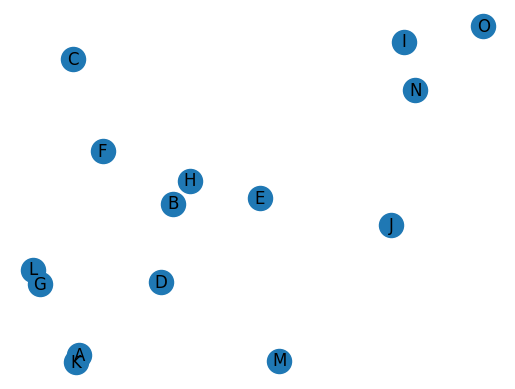

In [33]:
# generating figure
fig, axes = plt.subplots()

# setting random positions
pos_random = nx.random_layout(G_graph_ms)

# plotting figure
nx.draw(G_graph_ms, pos=pos_random, with_labels=True, ax=axes)

# Aufgabe 2 - MS

In [149]:
print(len(nodes))

15


In [150]:
# generate edges
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        G_graph_ms.add_edge(nodes[i], nodes[j])


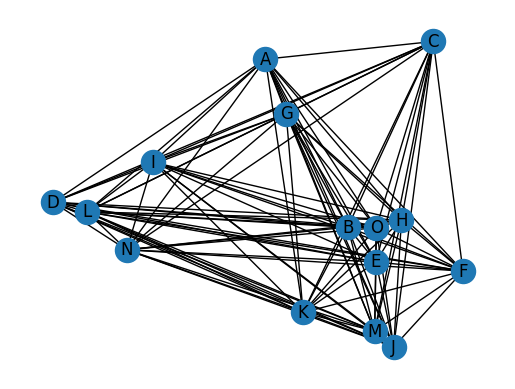

In [151]:
# generating figure
fig, axes = plt.subplots()

# setting random positions
pos_random = nx.random_layout(G_graph_ms)

# plotting figure
nx.draw(G_graph_ms, pos=pos_random, with_labels=True,)

# Aufgabe 3 - MS

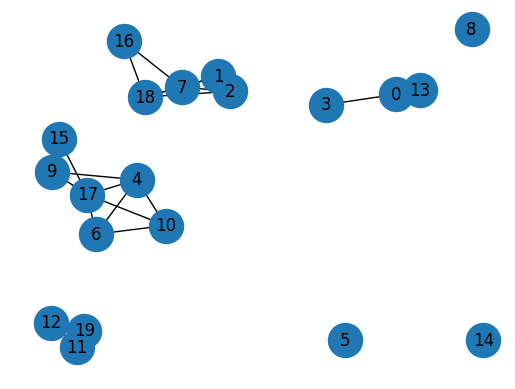

In [48]:
import random
import math

G_graph_ms_2 = nx.Graph()

non = 20 # number of nodes
given_distance = 0.2 # given distance between nodes


positions = {}
for i in range(non):
    position = (random.uniform(0, 1), random.uniform(0, 1))
    G_graph_ms_2.add_node(i, pos=position)
    positions[i] = position

for i in range(non):
    for j in range(i+1, non):
        pos_i = positions[i]
        pos_j = positions[j]
        distance = math.sqrt((pos_i[0] - pos_j[0])**2 + (pos_i[1] - pos_j[1])**2)
        if distance < given_distance:
            G_graph_ms_2.add_edge(i, j)

fig, axes = plt.subplots()
nx.draw(G_graph_ms_2, pos=positions, with_labels=True, node_size=600.0, ax=axes)
plt.show()